# Object Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# pre-trained data from https://github.com/opencv/opencv/tree/master/data/haarcascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

## Haar Feature-based Cascade Classifier for Object Detection

![](haarfeatures.png)

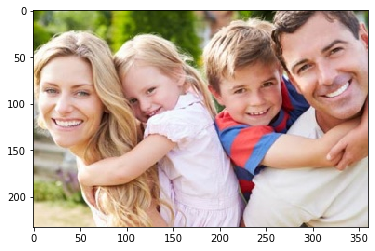

In [2]:
color_image = cv2.cvtColor(cv2.imread('../images/faces.jpg'), cv2.COLOR_BGR2RGB)
_ = plt.imshow(color_image)

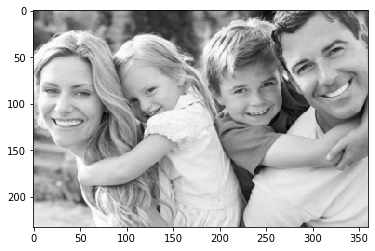

In [3]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
_ = plt.imshow(gray_image, cmap='gray')

In [5]:
# See https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1)
print('faces =', faces, sep='\n')

faces =
[[202  59  69  69]
 [  1  58  79  79]]


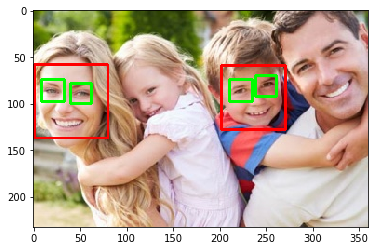

In [6]:
result_image = color_image.copy()

for (x, y, w, h) in faces:
    result_image = cv2.rectangle(result_image,
                        (x, y), (x + w, y + h),
                        (255, 0, 0), 2)
    roi_gray = gray_image[y:y + h, x:x + w]
    roi_color = result_image[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey),(ex + ew, ey + eh), (0, 255, 0), 2)

_ = plt.imshow(result_image)

## Reference
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html